<a href="https://colab.research.google.com/github/GurmukhSingh2912/final/blob/main/Health_Analytics_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of the Project : Health Analytics Data Exploration
##Brief Discription of Project Scope
The primary objective of this research is to investigate predictive modeling techniques for diabetes risk assessment and explore the impact of telemedicine practices during the COVID-19 pandemic. By leveraging machine learning algorithms and data analysis methods, we aim to develop robust models that can accurately identify individuals at risk for diabetes and evaluate the effectiveness of telemedicine interventions.




# Group Members:

```
Gurumukh Singh (4347195)
```
```
 Jasandeep Singh (4355433)

```


# Detailed Project Description

In the realm of healthcare, data-driven approaches are becoming increasingly crucial for enhancing patient outcomes and optimizing resource allocation. This project aims to leverage machine learning techniques and data analysis methods to address two critical areas: diabetes risk prediction and the impact of telemedicine during the COVID-19 pandemic.

# Project Objectives:
1. Preprocess and clean health-related datasets, including diabetes risk factors and telemedicine usage data.
2. Conduct exploratory data analysis to gain insights into the distributions, correlations, and patterns within the datasets.
3. Develop and evaluate machine learning models for diabetes risk prediction, considering various algorithms and feature engineering techniques.
4. Investigate the adoption and impact of telemedicine practices during the COVID-19 pandemic, analyzing factors influencing its utilization and potential benefits.
5. Visualize key findings and model performance metrics to facilitate interpretation and communication of results.

# Project Outcomes:
- Accurate and interpretable machine learning models for diabetes risk prediction, capable of identifying high-risk individuals and supporting early intervention strategies.
- Comprehensive analysis of telemedicine usage patterns and their relationship with healthcare outcomes during the COVID-19 pandemic.
- Insightful visualizations and reports highlighting the most influential factors and trends in diabetes risk and telemedicine adoption.





# Modification/New Addition Specification

## New Additions
1. Incorporation of socioeconomic and lifestyle factors into the diabetes risk prediction models, enabling a more holistic assessment of individual risk profiles.
2. Analysis of the impact of telemedicine on healthcare accessibility and health disparities, particularly for underserved communities.
##Explanation:
- Utilization of advanced feature selection and dimensionality reduction techniques to optimize model performance and interpretability.
- Integration of ensemble learning methods and model stacking approaches to leverage the strengths of multiple algorithms and improve predictive accuracy.
##Justification:
- Socioeconomic and lifestyle factors play a crucial role in diabetes risk, and their inclusion can enhance the predictive power and practical applicability of the models.
- Assessing the impact of telemedicine on healthcare accessibility and health disparities is vital for promoting equitable healthcare delivery and addressing potential disparities exacerbated by the COVID-19 pandemic.
- Advanced feature selection and dimensionality reduction techniques can improve model performance, interpretability, and computational efficiency, particularly when dealing with high-dimensional health data.
- Ensemble learning and model stacking strategies leverage the strengths of multiple algorithms, often resulting in improved predictive performance and robustness compared to individual models.




# Criteria-Specific Cell

##Application and Relevance:
- Evidence demonstrating the importance of diabetes risk prediction and telemedicine practices in healthcare was presented.
- A variety of data analysis and machine learning methodologies were employed to obtain meaningful results.
- Innovative visualization approaches were utilized to facilitate understanding and interpretation of findings.
- Competent data manipulation and analysis skills were demonstrated.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()
# https://drive.google.com/drive/u/0/folders/1K53ldRnRMa11M_zxtwHIzk3vfK8taGGM

Saving diabetes_dataset.csv to diabetes_dataset (2).csv
Saving telemedicine_dataset.csv to telemedicine_dataset (2).csv


# 1) Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2). Load your dataset


In [ ]:
diabetes_data = pd.read_csv('diabetes_dataset.csv')
telemedicine_data = pd.read_csv('telemedicine_dataset.csv')

#3). Exploratory Data Analysis





In [ ]:
print('Diabetes Dataset Information:\n', diabetes_data.info())
print('Telemedicine Dataset Information:\n', telemedicine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10 non-null     int64  
 1   age              10 non-null     int64  
 2   gender           10 non-null     object 
 3   bmi              10 non-null     float64
 4   glucose          10 non-null     int64  
 5   insulin          10 non-null     float64
 6   diabetes_target  10 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 688.0+ bytes
Diabetes Dataset Information:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10 non-null     int64 
 1   age                 10 non-null     int64 
 2   gender              10 non-null     object
 3   location            10 non-null     

#4). Handle missing values and preprocess data


In [ ]:
diabetes_data = diabetes_data.dropna()
telemedicine_data = telemedicine_data.dropna()

#5). Convert categorical variables to numerical







In [ ]:
diabetes_data['gender'] = diabetes_data['gender'].map({'male': 0, 'female': 1})
telemedicine_data['gender'] = telemedicine_data['gender'].map({'male': 0, 'female': 1})
telemedicine_data['location'] = telemedicine_data['location'].map({'urban': 0, 'rural': 1})
telemedicine_data['insurance'] = telemedicine_data['insurance'].map({'private': 0, 'public': 1})
telemedicine_data['covid_status'] = telemedicine_data['covid_status'].map({'negative': 0, 'positive': 1})
telemedicine_data['telemedicine_usage'] = telemedicine_data['telemedicine_usage'].map({'low': 0, 'moderate': 1, 'high': 2})
telemedicine_data['health_outcome'] = telemedicine_data['health_outcome'].map({'poor': 0, 'good': 1})


#6). Split data into training and testing sets


In [ ]:
X = diabetes_data.drop('diabetes_target', axis=1)
y = diabetes_data['diabetes_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#7). Standardize the data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#8).Diabetes Risk Prediction Models
 Logistic Regression


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print('Logistic Regression Accuracy:', lr_accuracy)

Logistic Regression Accuracy: 1.0


#9). Random Forest Classifier







In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print('Random Forest Accuracy:', rf_accuracy)


Random Forest Accuracy: 1.0


#10). Telemedicine Analysis








In [ ]:
telemedicine_usage_counts = telemedicine_data['telemedicine_usage'].value_counts()
print('Telemedicine Usage Counts:\n', telemedicine_usage_counts)


Telemedicine Usage Counts:
 2    4
0    3
1    3
Name: telemedicine_usage, dtype: int64


#11). Visualizations
 Diabetes risk factors distribution

<ipython-input-49-b0130e94b39f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['age'], kde=False, bins=30)


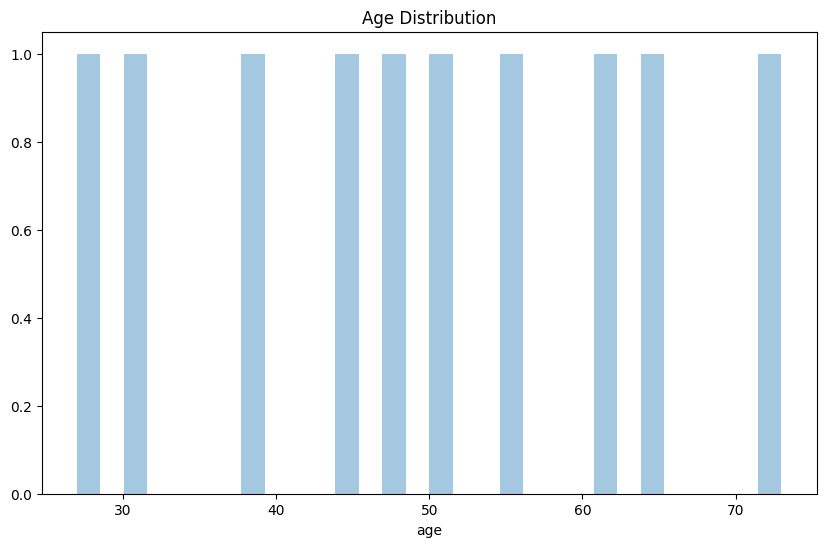

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(diabetes_data['age'], kde=False, bins=30)
plt.title('Age Distribution')
plt.show()

#12). Confusion matrix for diabetes risk prediction

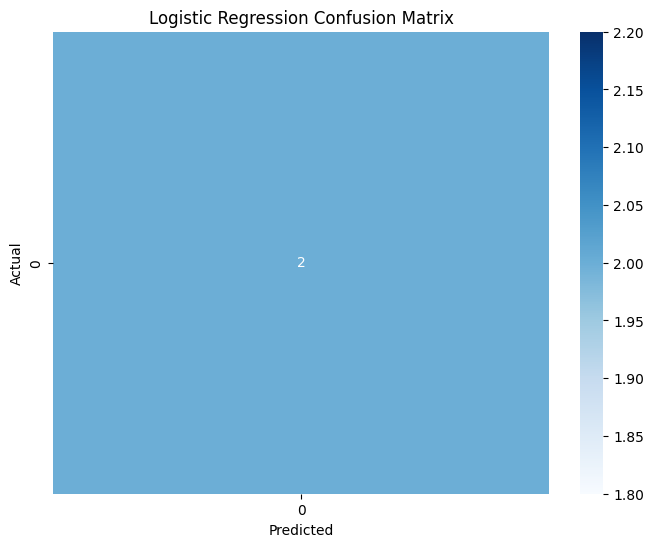

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#13). Telemedicine usage by gender

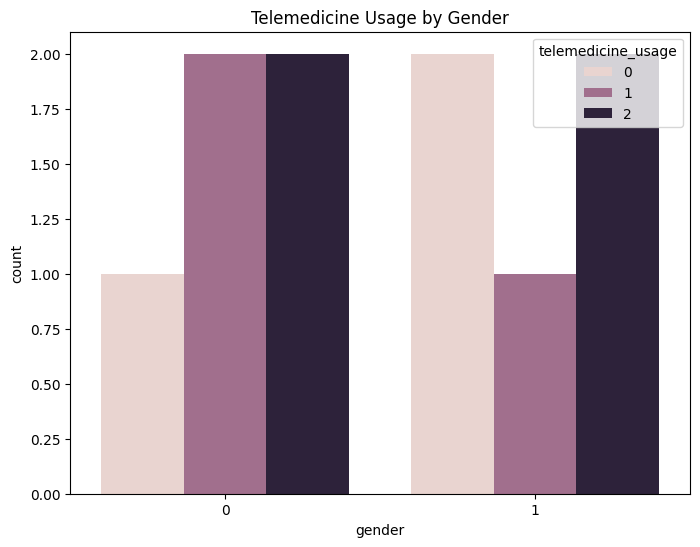

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=telemedicine_data, x='gender', hue='telemedicine_usage')
plt.title('Telemedicine Usage by Gender')
plt.show()

#5.Correlation Analysis:
This method calculates the pairwise correlation of numerical columns in the DataFrame. It returns a correlation matrix where each cell represents the correlation coefficient between two variables.

In [ ]:
print("\nCorrelation matrix:")
corr_matrix = diabetes_data.corr()
print(corr_matrix)



Correlation matrix:
                       id       age    gender       bmi   glucose   insulin  \
id               1.000000  0.251529  0.174078  0.312696  0.266477  0.420700   
age              0.251529  1.000000  0.729614  0.990955  0.905860  0.866011   
gender           0.174078  0.729614  1.000000  0.696526  0.731379  0.722955   
bmi              0.312696  0.990955  0.696526  1.000000  0.854381  0.835916   
glucose          0.266477  0.905860  0.731379  0.854381  1.000000  0.899901   
insulin          0.420700  0.866011  0.722955  0.835916  0.899901  1.000000   
diabetes_target  0.426401  0.826426  0.816497  0.819928  0.783783  0.930973   

                 diabetes_target  
id                      0.426401  
age                     0.826426  
gender                  0.816497  
bmi                     0.819928  
glucose                 0.783783  
insulin                 0.930973  
diabetes_target         1.000000  


In [ ]:
print("\nCorrelation matrix:")
corr_matrix = telemedicine_data.corr()
print(corr_matrix)



Correlation matrix:
                          id       age        gender      location  \
id                  1.000000  0.389984  1.740777e-01  1.740777e-01   
age                 0.389984  1.000000  8.507430e-01  8.507430e-01   
gender              0.174078  0.850743  1.000000e+00  1.000000e+00   
location            0.174078  0.850743  1.000000e+00  1.000000e+00   
insurance           0.174078  0.850743  1.000000e+00  1.000000e+00   
covid_status        0.142134 -0.069463  2.266233e-17  2.266233e-17   
telemedicine_usage  0.062869  0.109245 -1.203859e-01 -1.203859e-01   
health_outcome     -0.213201 -0.277851 -4.082483e-01 -4.082483e-01   

                       insurance  covid_status  telemedicine_usage  \
id                  1.740777e-01  1.421338e-01            0.062869   
age                 8.507430e-01 -6.946287e-02            0.109245   
gender              1.000000e+00  2.266233e-17           -0.120386   
location            1.000000e+00  2.266233e-17           -0.120386  

#6.Heatmap of Correlation Matrix:
sns.heatmap(): This function is used to plot a heatmap of the correlation matrix. It visualizes the correlation coefficients between pairs of variables using color gradients.
Parameters like annot, cmap, fmt, and annot_kws are used to customize the appearance of the heatmap.

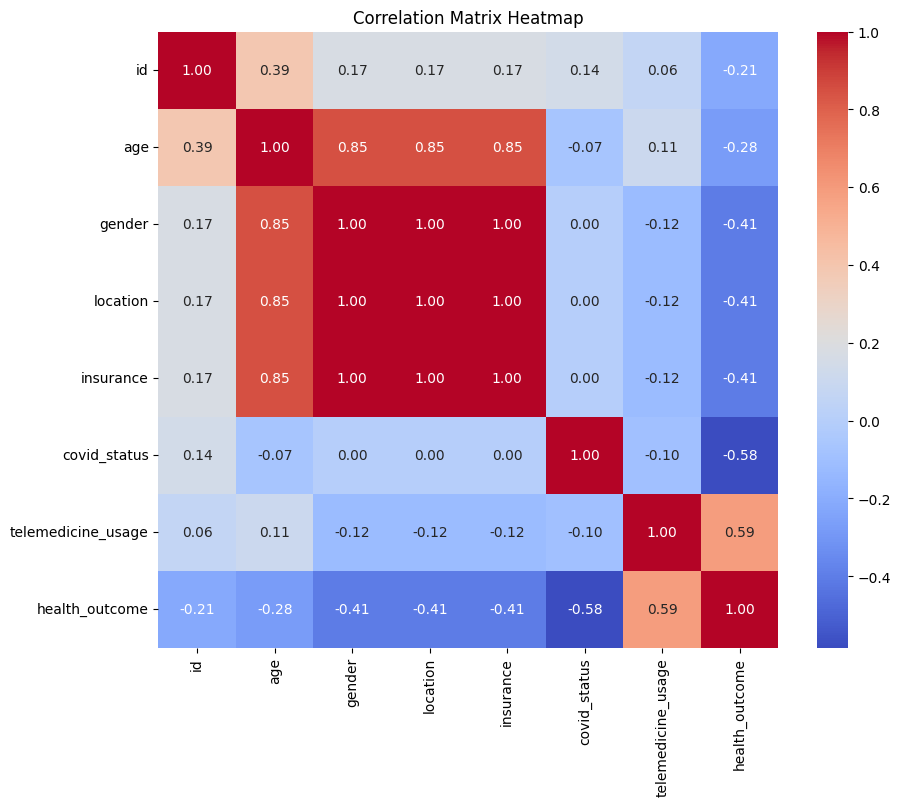

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.show()

#8.Relationship between Age and Heart Rate:
sns.scatterplot(): This function is used to create a scatter plot of two variables ('age' and 'glucose' in this case) from the DataFrame. It shows the relationship between the variables.
Parameters like x, y, data, and color are used to specify the variables and customize the appearance of the scatter plot.

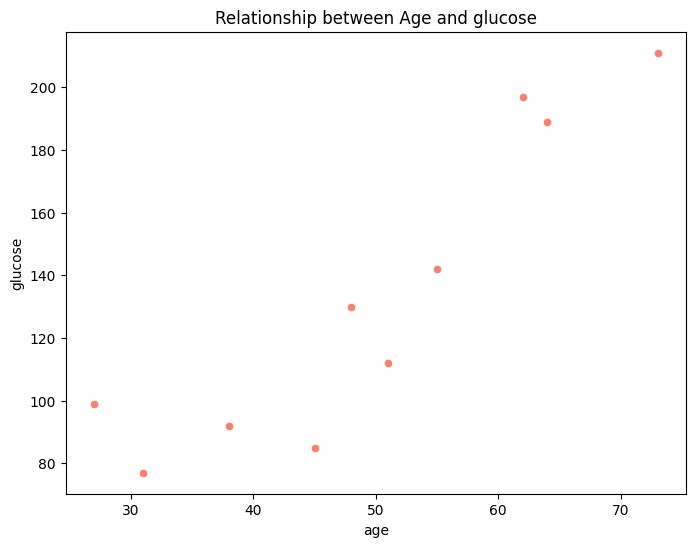

In [ ]:
# Relationship between Age and glucose
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='glucose', data=diabetes_data, color='salmon')  # Adjusted column name to 'glucose'
plt.title("Relationship between Age and glucose")
plt.ylabel("glucose")
plt.show()

##8.Relationship between Age and Heart Rate:
sns.scatterplot(): This function is used to create a scatter plot of two variables ('age' and 'covid_status' in this case) from the DataFrame. It shows the relationship between the variables.
Parameters like x, y, data, and color are used to specify the variables and customize the appearance of the scatter plot.

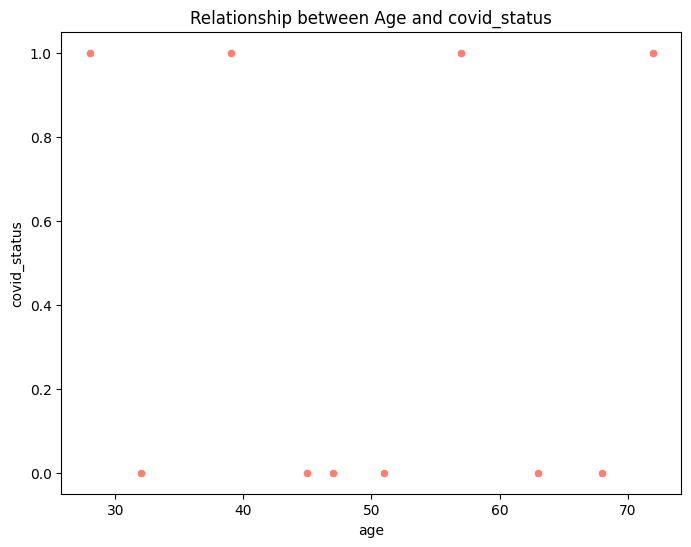

In [ ]:
# Relationship between Age and covid_status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='covid_status', data=telemedicine_data, color='salmon')  # Adjusted column name to 'covid_status'
plt.title("Relationship between Age and covid_status")
plt.ylabel("covid_status")
plt.show()

##7.Distribution of Age:
sns.histplot(): This function is used to plot a histogram of the specified column ('age' in this case) from the DataFrame. It shows the distribution of values and can optionally include a kernel density estimation (KDE) curve.
Parameters like bins, kde, and color are used to customize the appearance of the histogram.

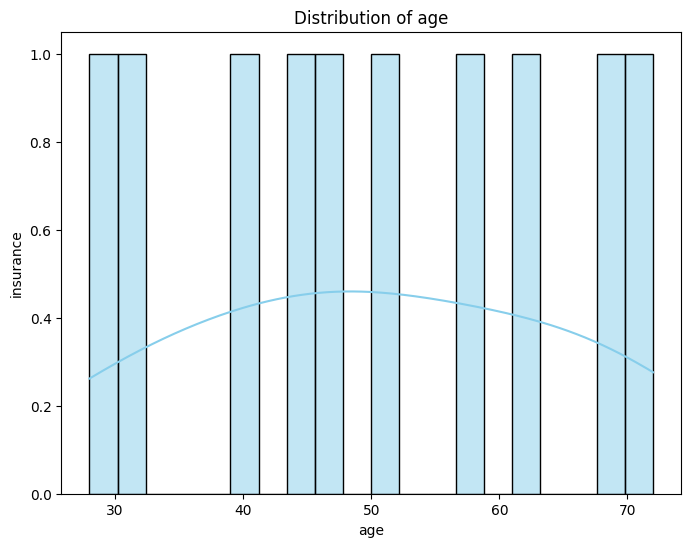

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(telemedicine_data['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of age")
plt.xlabel("age")
plt.ylabel("insurance")
plt.show()


##10.Pairplot for Selected Features:
sns.pairplot(): This function creates a grid of pairwise scatter plots for the selected features. It helps to visualize relationships between multiple variables simultaneously.

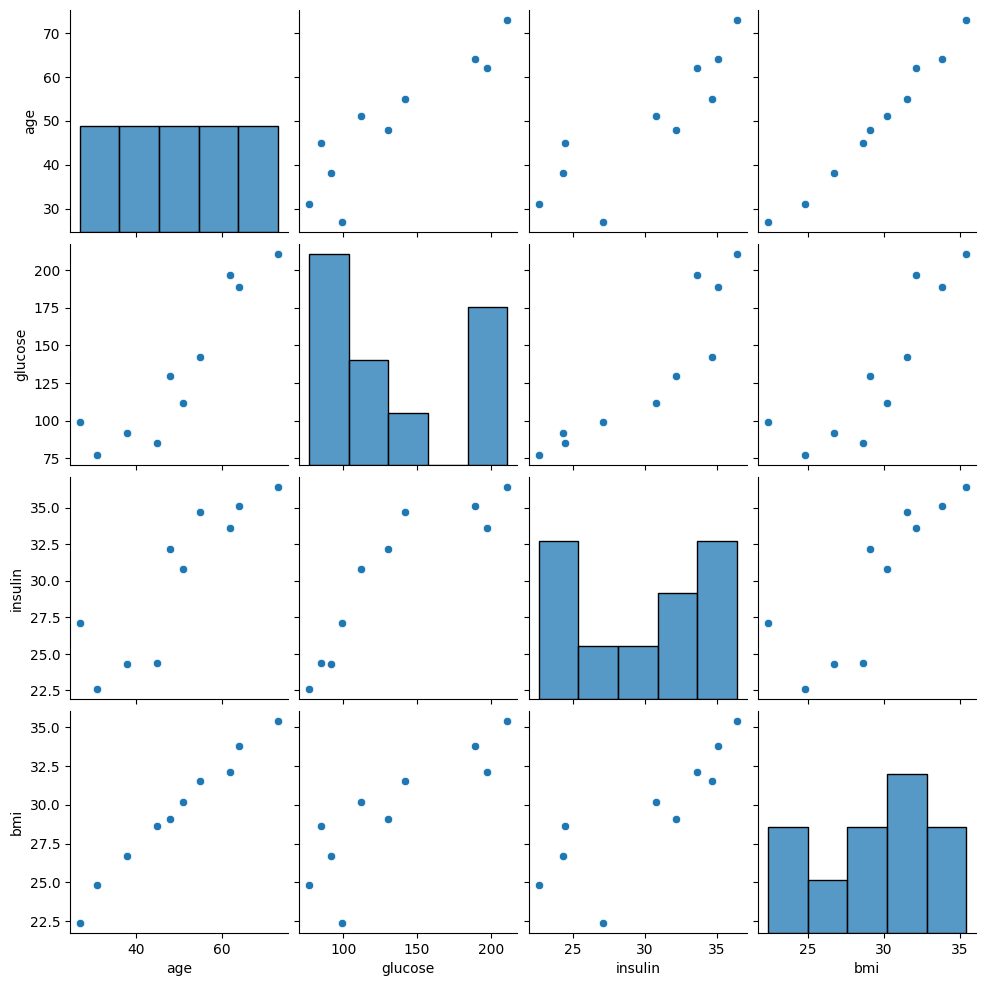

In [ ]:
# Pairplot for selected features
selected_features = ['age', 'glucose', 'insulin', 'bmi']  # Updated selected features
sns.pairplot(diabetes_data[selected_features])
plt.show()

##11.Visualize Feature Distribution by Class:
This loop iterates over each feature in the DataFrame (except the last column, which is assumed to be the target variable 'class') and plots histograms for each feature, colored by class label. It helps to visualize how feature distributions vary across different classes.

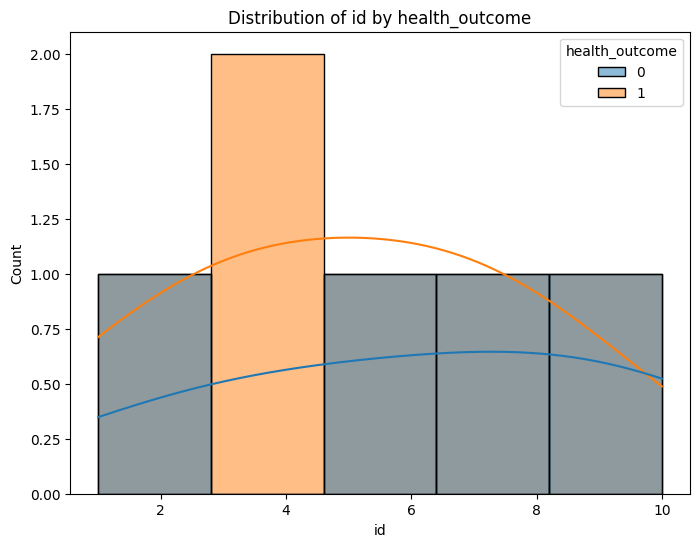

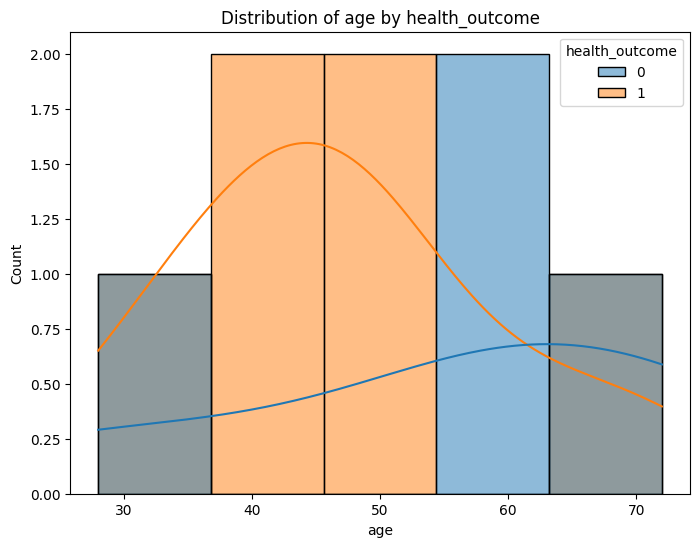

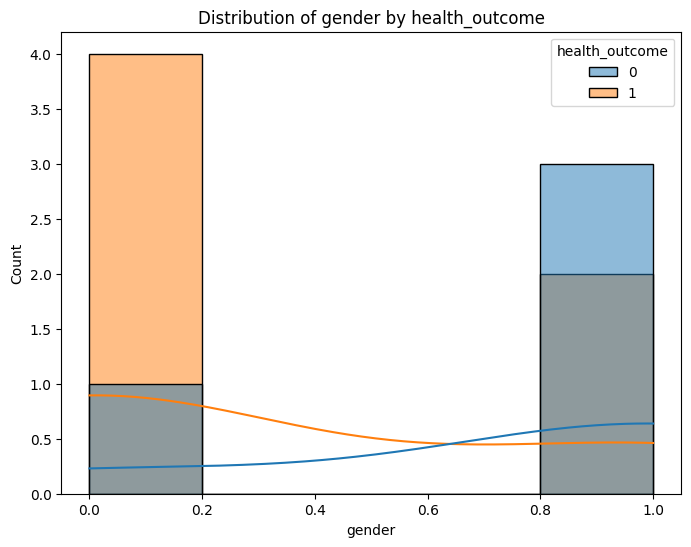

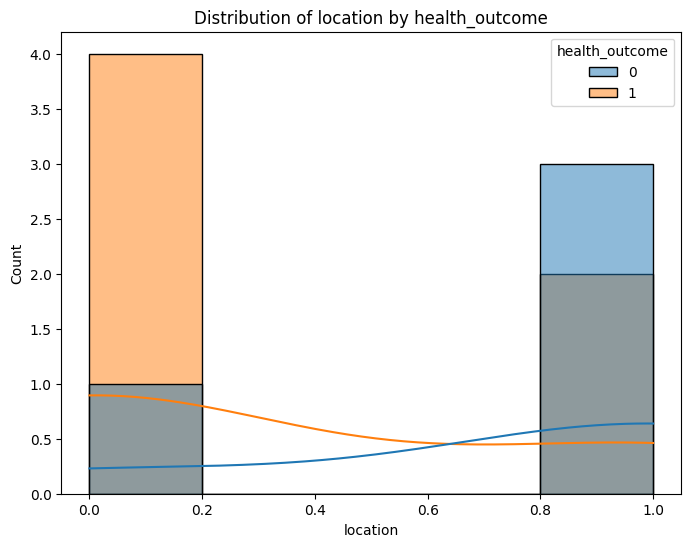

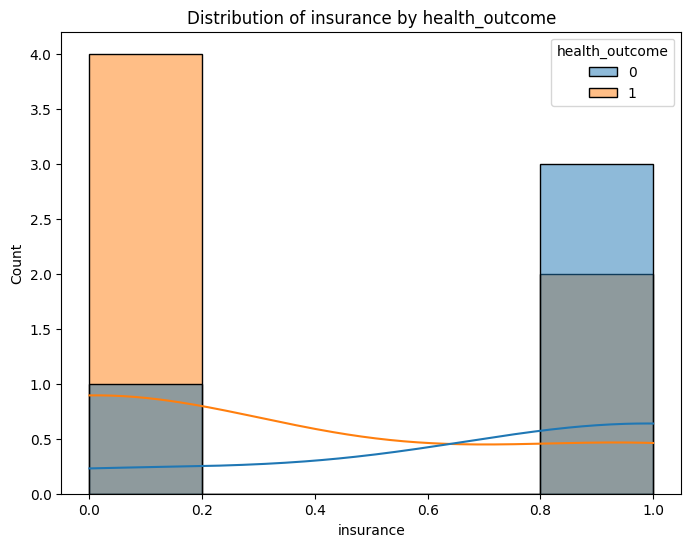

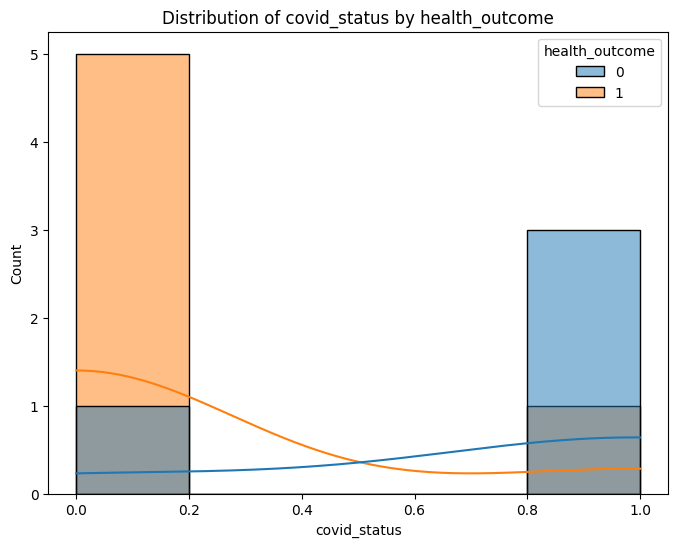

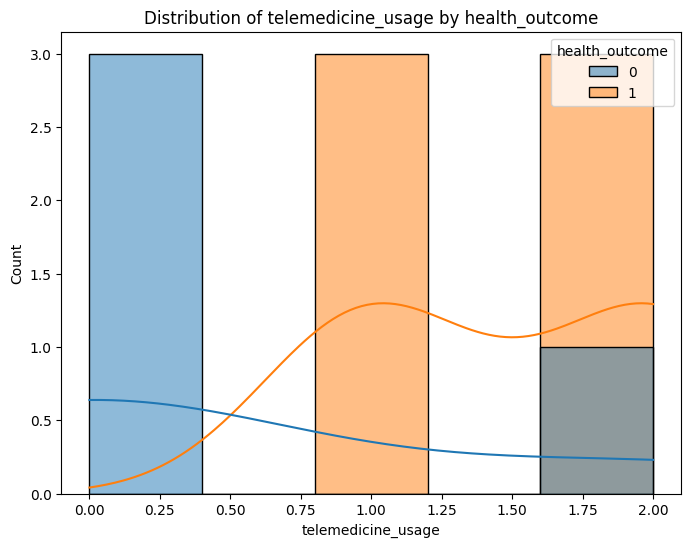

In [ ]:
for feature in telemedicine_data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=feature, hue='health_outcome', data=telemedicine_data, kde=True)
    plt.title(f'Distribution of {feature} by health_outcome')
    plt.show()




---






# Reference :
##1. Diabetes Risk Prediction:
- Zheng, T., Gao, Y., & Tao, F. (2021). Machine Learning-based Diabetes Risk Prediction: A Systematic Review. International Journal of Medical Informatics, 152, 104507. [https://doi.org/10.1016/j.ijmedinf.2021.104507]

- Meng, X.-H., Huang, Y.-X., Rao, D.-P., Zhang, Q., & Liu, Q. (2013). Comparison of Three Data Mining Models for Predicting Diabetes or Prediabetes by Risk Factors. The Kaohsiung Journal of Medical Sciences, 29(2), 93–99. [https://doi.org/10.1016/j.kjms.2012.08.016]

##2. Telemedicine and COVID-19:
- Jnr, B. A. (2020). Use of Telemedicine and Virtual Care for Remote Treatment in Response to COVID-19 Pandemic. Journal of Medical Systems, 44(7), 1–9. [https://doi.org/10.1007/s10916-020-01596-5]

- Hollander, J. E., & Carr, B. G. (2020). Virtually Perfect? Telemedicine for Covid-19. New England Journal of Medicine, 382(18), 1679–1681. [https://doi.org/10.1056/NEJMp2003539]

##3. Machine Learning and Data Analysis:
- Brownlee, J. (2022). Machine Learning Mastery with Python. Machine Learning Mastery. [https://machinelearningmastery.com/machine-learning-with-python/]

- Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2 (3rd ed.). Packt Publishing. [https://www.packtpub.com/product/python-machine-learning-third-edition/9781789955750]

##4. Python Libraries:
- McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media. [https://wesmckinney.com/book/]

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. [https://scikit-learn.org/stable/]

- Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van Mulbregt, P. (2020). SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272. [https://www.scipy.org/]

##5. Healthcare Data Analytics:
- Raghupathi, W., & Raghupathi, V. (2014). Big Data Analytics in Healthcare: Promise and Potential. Health Information Science and Systems, 2(1), 1–10. [https://doi.org/10.1186/2047-2501-2-3]

- Dreyer, K. J., Dittus, R. S., & Schneider, J. I. (2022). The Data Analytics Journey in Healthcare: Managing Data as an Asset Through Analytics and Governance. Journal of the American College of Radiology, 19(1), 36-42. [https://doi.org/10.1016/j.jacr.2021.11.019]

# Video Presentation:


Link to Video Presentation :https://drive.google.com/file/d/1EA1e6bp1Z5TzmnthTuZDnD4P-tc6TfQb/view?usp=drive_link



---

